---

# <center><span style="color:red"> Practica 2: Análisis de extremos, análisis espectral y filtros</center></span>

---

In [184]:
# módulos necesarios
# modulos propios de python
import math
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')


# módulos de lectura y tratamiento de datos
import pandas  as pd
import numpy   as np
import netCDF4 as nc
import xarray  as xr

# estadistica
from scipy import stats
from scipy import special


# librerias de visualización de datos
import matplotlib.pyplot as plt
import seaborn           as sns
import cartopy.crs       as ccrs

## <span style="color:green"> Objetivo 1: Análisis de Extremos </span>

<span style='color:black'>En esta primera parte de la práctica 2 se pretende analizar algunos índices de extremos de temperatura o precipitación en las regiones definidas empleando bases de datos de temperatura o precipitacion.
</span>

In [185]:
# carpeta donde tengo los datos
folder = 'data/'

# abro y leo datos de mínima temperatura diaria
temp_min = xr.open_dataset(f'{folder}tmin_pen.nc')

In [187]:
# acoto los datos a las latitudes y longitudes correspondientes al norte
lats  = [43.8, 42.5]
longs = [-6.0, 0.0]

# selecciono los datos con los que voy a tratar
temp_min = temp_min.sel(lon=slice(longs[0], longs[1]), lat=slice(lats[0], lats[1]),
                        Time=slice(datetime(1973, 1, 1), datetime(2015, 1, 1)))

# separamos los datos en dos periodos
temp_min_1 = temp_min.sel(Time=slice('1973', '1994'))

temp_min_2 = temp_min.sel(Time=slice('1995', '2015'))

In [189]:
# cold nights
# calculo de 10th percentile para mi región
qt_dims = ("Time")
qt_values = (0.1)

# calculo de los cuantiles para cada subset
ds_qt_1 = temp_min_1.quantile(qt_values, dim=qt_dims)
ds_qt_2 = temp_min_2.quantile(qt_values, dim=qt_dims)

# calculo cual va a ser el valor del quantil sup y inferior
minimo = np.min((ds_qt_1.min().tn, ds_qt_2.min().tn))
maximo = np.max((ds_qt_1.max().tn, ds_qt_2.max().tn))

### <span style="color:darkblue"> Cold Nights </span>

In [190]:
# para el primer periodo calculo del porcentaje de noches frías
num_cold_1 = np.sum(np.where(temp_min_1.tn < ds_qt_1.to_array() , 1, 0),axis=0)

n = temp_min_1.tn.shape[0]
perc_1 = num_cold_1*100/n
# elimino la dimension 1
perc_1 = np.squeeze(perc_1)


In [191]:
# para el segundo periodo calculo del porcentaje de noches frías
num_cold_2 = np.sum(np.where(temp_min_2.tn < ds_qt_1.to_array() , 1, 0),axis=0)

n = temp_min_2.tn.shape[0]
perc_2 = num_cold_2*100/n
# elimino la dimension 1
perc_2 = np.squeeze(perc_2)

# para hacer el grafico
mini = np.min((np.min(perc_1), np.min(perc_2)))
maxi = np.max((np.max(perc_1), np.max(perc_2)))

# latitud y longitud
lon = ds_qt_1.lon
lat = ds_qt_1.lat

Text(0.5, 0.98, 'Porcentaje de noches frías definiendo el percentil con el primer periodo')

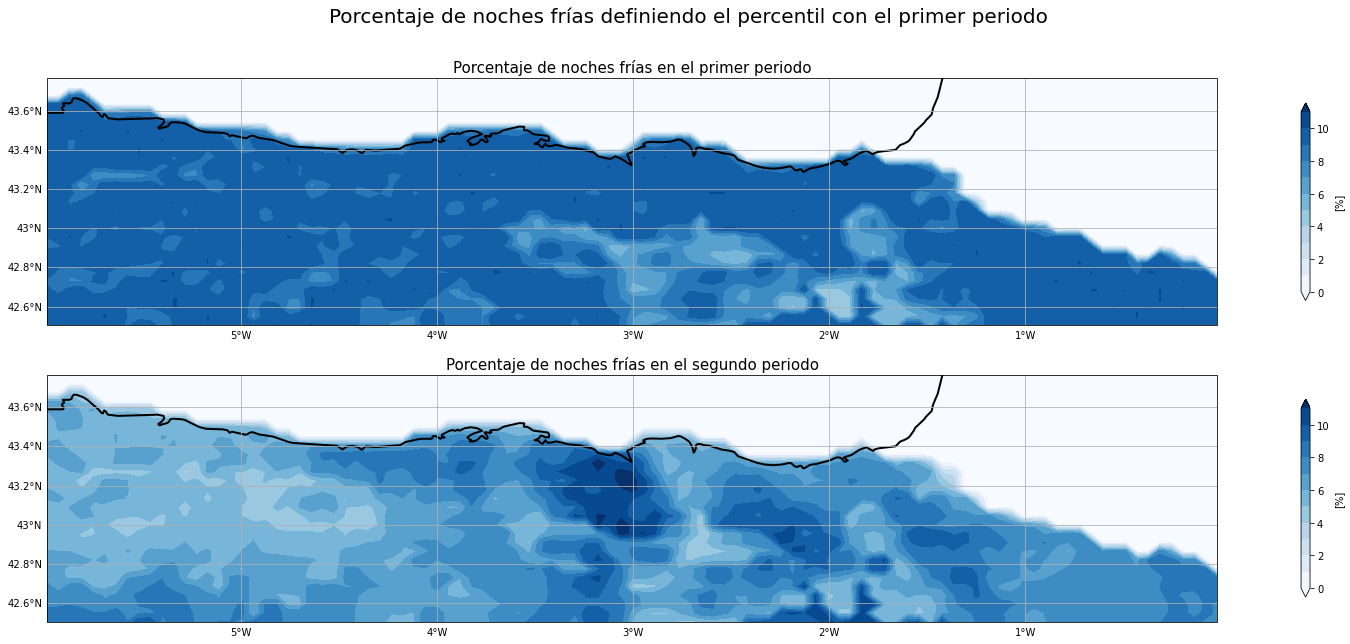

In [192]:
#Representamos el porcentaje para cada punto de la malla de datos
fig = plt.figure(figsize=(30,10), tight_layout=False) 
ax1 = fig.add_subplot(211, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(212, projection=ccrs.PlateCarree())
cbarticks = np.arange(mini,maxi,1)

ax1.coastlines(linewidth = 2)
gl=ax1.gridlines(draw_labels = True)
gl.ylabels_right = False
gl.xlabels_top   = False

ax2.coastlines(linewidth = 2)
gl = ax2.gridlines(draw_labels = True)
gl.ylabels_right = False
gl.xlabels_top   = False

 
cmap= 'Blues'
unidades= '[%]'

im=ax1.contourf(lon, lat, perc_1, cbarticks,cmap = cmap, extend='both', 
                  vmin = mini, vmax = maxi)

im2=ax2.contourf(lon, lat, perc_2, cbarticks,cmap = cmap, extend='both', 
                   vmin = mini, vmax = maxi)
fig.colorbar(im,ax=ax1,shrink=0.8, label=unidades,orientation='vertical')
fig.colorbar(im2,ax=ax2,shrink=0.8, label=unidades,orientation='vertical')
ax1.set_title('Porcentaje de noches frías en el primer periodo',fontsize=15)
ax2.set_title('Porcentaje de noches frías en el segundo periodo',fontsize=15)
fig.suptitle('Porcentaje de noches frías definiendo el percentil con el primer periodo',
             fontsize = 20)

In [193]:
# para el primer periodo calculo del porcentaje de noches frías
num_cold_1 = np.sum(np.where(temp_min_1.tn < ds_qt_2.to_array() , 1, 0), axis=0)

n = temp_min_1.tn.shape[0]
perc_1 = num_cold_1*100/n
# elimino la dimension 1
perc_1 = np.squeeze(perc_1)


In [194]:
# para el segundo periodo calculo del porcentaje de noches frías
num_cold_2 = np.sum(np.where(temp_min_2.tn < ds_qt_2.to_array() , 1, 0),axis=0)

n = temp_min_2.tn.shape[0]
perc_2 = num_cold_2*100/n
# elimino la dimension 1
perc_2 = np.squeeze(perc_2)

# para hacer el grafico
mini = np.min((np.min(perc_1), np.min(perc_2)))
maxi = np.max((np.max(perc_1), np.max(perc_2)))

# latitud y longitud
lon = ds_qt_1.lon
lat = ds_qt_1.lat

Text(0.5, 0.98, 'Porcentaje de noches frías definiendo el percentil con el segundo periodo')

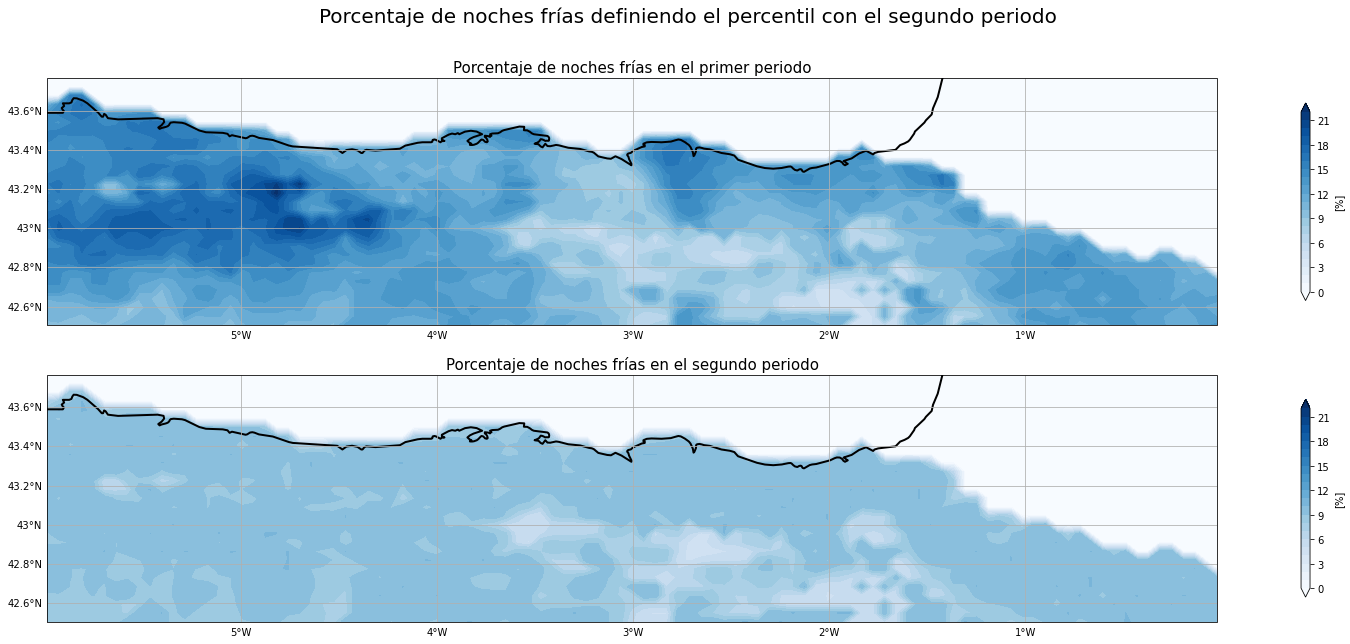

In [195]:
#Representamos el porcentaje para cada punto de la malla de datos
fig = plt.figure(figsize=(30,10), tight_layout=False) 
ax1 = fig.add_subplot(211, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(212, projection=ccrs.PlateCarree())
cbarticks = np.arange(mini,maxi,1)

ax1.coastlines(linewidth = 2)
gl=ax1.gridlines(draw_labels = True)
gl.ylabels_right = False
gl.xlabels_top   = False

ax2.coastlines(linewidth = 2)
gl = ax2.gridlines(draw_labels = True)
gl.ylabels_right = False
gl.xlabels_top   = False

 
cmap= 'Blues'
unidades= '[%]'

im=ax1.contourf(lon, lat, perc_1, cbarticks,cmap = cmap, extend='both', 
                  vmin = mini, vmax = maxi)

im2=ax2.contourf(lon, lat, perc_2, cbarticks,cmap = cmap, extend='both', 
                   vmin = mini, vmax = maxi)
fig.colorbar(im,ax=ax1,shrink=0.8, label=unidades,orientation='vertical')
fig.colorbar(im2,ax=ax2,shrink=0.8, label=unidades,orientation='vertical')
ax1.set_title('Porcentaje de noches frías en el primer periodo',fontsize=15)
ax2.set_title('Porcentaje de noches frías en el segundo periodo',fontsize=15)
fig.suptitle('Porcentaje de noches frías definiendo el percentil con el segundo periodo',
             fontsize = 20)

### <span style="color:darkblue"> Periodo de Retorno </span>

## <span style="color:green"> Objetivo 2: Análisis de las periodicidades fundamentales de los extremos</span>